As a first step, you need to start Graph database you want to access and install neo4j library

In [1]:
! pip install neo4j

In [1]:
#create a python driver

import pandas as pd
from neo4j import GraphDatabase

#specify a local connection
URL = "bolt://localhost:7687"

#enter the name of the database and password
USER="neo4j"
PWD="12345"

driver=GraphDatabase.driver(URL, auth=(USER,PWD))

In [2]:
#create a session object
session=driver.session()

In [3]:
# run a query
result=session.run("match (u:User)-[:IS_RETWEETED_BY]->(u2:User) \
return u.name as name, count(u2) as numRetweetedUsers \
order by numRetweetedUsers \
desc limit 10")

In [4]:
#  look at the first result  
record=result.peek()
record

<Record name='ziyanm_' numRetweetedUsers=6470>

In [5]:
# Save the query results into a list
result_list=result.data()
result_list

[{'name': 'ziyanm_', 'numRetweetedUsers': 6470},
 {'name': 'mariamainmo', 'numRetweetedUsers': 5723},
 {'name': 'aslavitt46', 'numRetweetedUsers': 3854},
 {'name': 'kylegriffin1', 'numRetweetedUsers': 3552},
 {'name': 'POTUS', 'numRetweetedUsers': 3325},
 {'name': 'danieteebee', 'numRetweetedUsers': 2848},
 {'name': 'sahilkapur', 'numRetweetedUsers': 2561},
 {'name': 'Breaking911', 'numRetweetedUsers': 2400},
 {'name': 'NBCPolitics', 'numRetweetedUsers': 2103},
 {'name': 'NBCNews', 'numRetweetedUsers': 2042}]

In [6]:
# covert result list into a python dataframe

result_pd = pd.DataFrame(list(result_list))
result_pd

,name,numRetweetedUsers
0,ziyanm_,6470
1,mariamainmo,5723
2,aslavitt46,3854
3,kylegriffin1,3552
4,POTUS,3325
5,danieteebee,2848
6,sahilkapur,2561
7,Breaking911,2400
8,NBCPolitics,2103
9,NBCNews,2042


Text(0.5, 1.0, 'Top 10 Twitter Account by Retweeted Users')

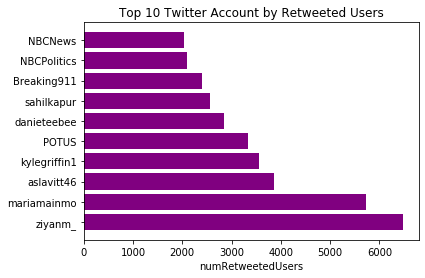

In [7]:
# visualize the result
import matplotlib.pyplot as plt
%matplotlib inline

plt.barh(result_pd["name"], result_pd["numRetweetedUsers"], align='center', color="purple")
plt.xlabel('numRetweetedUsers')
plt.title("Top 10 Twitter Account by Retweeted Users")

In [8]:
# close neo4j session
session.close

<bound method Session.close of <neo4j.work.simple.Session object at 0x000001D30BBAC978>>

In [9]:
#put everything together
# define a function to run graph query. The function input a match query and return the result in a pandas dataframe
# this function will automatically close neo4j session.
import pandas as pd
from neo4j import GraphDatabase

#specify a local connection
URL = "bolt://localhost:7687"

#enter the name of the database and password
USER="neo4j"
PWD="12345"
driver=GraphDatabase.driver(URL, auth=(USER,PWD))

def queryGraph(myquery):
             
    with driver.session() as session:
        result=session.run(myquery)
        result_list=result.data()
        result_pd = pd.DataFrame(list(result_list))  
    
    return result_pd

In [10]:
myquery="match (u:User)-[:IS_RETWEETED_BY]->(u2:User) \
return u.name as name, count(u2) as numRetweetedUsers \
order by numRetweetedUsers desc limit 10"

result=queryGraph(myquery)
result

,name,numRetweetedUsers
0,ziyanm_,6470
1,mariamainmo,5723
2,aslavitt46,3854
3,kylegriffin1,3552
4,POTUS,3325
5,danieteebee,2848
6,sahilkapur,2561
7,Breaking911,2400
8,NBCPolitics,2103
9,NBCNews,2042


Text(0.5, 1.0, 'Top 10 Twitter Account by Retweeted Users')

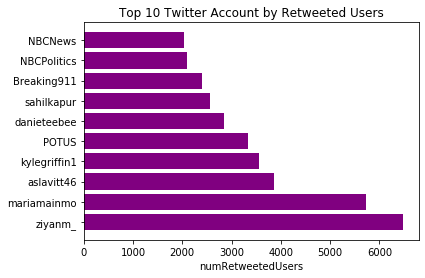

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.barh(result_pd["name"], result_pd["numRetweetedUsers"], align='center', color="purple")
plt.xlabel('numRetweetedUsers')
plt.title("Top 10 Twitter Account by Retweeted Users")

In [12]:
# top accounts by pageRank

myquery="match (u:User) \
return u.name as name, u.followers as followers, u.friends as friends, u.pr as pageRank \
order by pageRank desc \
limit 1000"

result=queryGraph(myquery)
result

,followers,friends,name,pageRank
0,69,3,PluginTwter,20.917486
1,637,10,news24x75,5.982329
2,5885,4527,viralvideovlogs,5.265842
3,1107,5010,maryredd,2.799499
4,535,8,polytwonk,2.656382
5,48,62,BabaC70317378,2.484573
6,4526,1,LndOntRetweets,2.328345
7,3902,3209,unlewis,2.043315
8,445,1135,KRISHANMOHANKR6,2.012412
9,1159,3,CoronaUpdateBot,1.944757


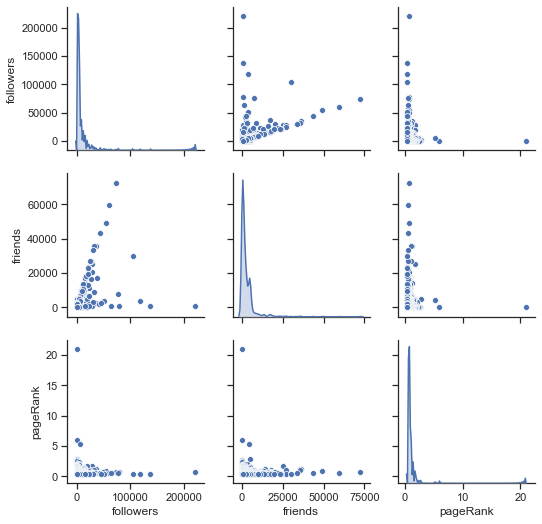

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

sns.pairplot(result, diag_kind="kde")